In [1]:
# Standard Data Packages
import pandas as pd
import numpy as np

# Visualization Packages
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

# tf and keras
import tensorflow as tf
from keras import models
from keras import layers

from sklearn import metrics

In [2]:
train_set = pd.read_csv('train_norm_set.csv')
val_set = pd.read_csv('val_norm_set.csv')

In [3]:
features = ["CreditScore", "Geography", "Gender", "Age", "Tenure", "Balance", "NumOfProducts", "HasCrCard", "IsActiveMember", "EstimatedSalary"]

X_train = train_set[features]
Y_train = train_set["Exited"]

X_val = val_set[features]
Y_val = val_set["Exited"]

In [4]:
X_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.670,0,0,0.283784,0.2,0.000000,0.333333,1,1,0.779371
1,0.618,2,1,0.729730,0.4,0.551190,0.000000,1,1,0.418130
2,0.468,0,0,0.297297,0.5,0.000000,0.000000,1,0,0.567905
3,0.456,1,1,0.148649,0.6,0.572697,0.333333,1,0,0.700698
4,0.790,0,1,0.243243,0.9,0.000000,0.000000,1,1,0.539375


In [5]:
X_train.dtypes

CreditScore        float64
Geography            int64
Gender               int64
Age                float64
Tenure             float64
Balance            float64
NumOfProducts      float64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
dtype: object

In [6]:
X_train = X_train.astype('float64')
X_val = X_val.astype('float64')

In [7]:
X_train.dtypes

CreditScore        float64
Geography          float64
Gender             float64
Age                float64
Tenure             float64
Balance            float64
NumOfProducts      float64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
dtype: object

In [8]:
def build_model1(learning_rate=0.01):
    
    tf.keras.backend.clear_session()
    tf.random.set_seed(0)
    
    input = tf.keras.layers.Input(shape = (1, ), dtype = tf.float64, name = "CreditScore")

    #add dense layer 1
    hidden1 = tf.keras.layers.Dense(units = 32, activation = "relu", name = "hidden1")(input)
    
    #add dense layer 2
    hidden2 = tf.keras.layers.Dense(units = 24, activation = "relu", name = "hidden2")(hidden1)

    #add output layer
    dx = tf.keras.layers.Dense(units = 1, activation = "sigmoid", name = "Dx")(hidden2)
    
    #configure model
    model = tf.keras.Model(inputs = input, outputs = dx, name = "model1")
    
    optimizer = tf.keras.optimizers.SGD(learning_rate = learning_rate)
    
    model.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics = ['accuracy'])
    
    return model

Model: "model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CreditScore (InputLayer)    [(None, 1)]               0         
                                                                 
 hidden1 (Dense)             (None, 32)                64        
                                                                 
 hidden2 (Dense)             (None, 24)                792       
                                                                 
 Dx (Dense)                  (None, 1)                 25        
                                                                 
Total params: 881
Trainable params: 881
Non-trainable params: 0
_________________________________________________________________


2024-07-16 15:27:27.676209: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


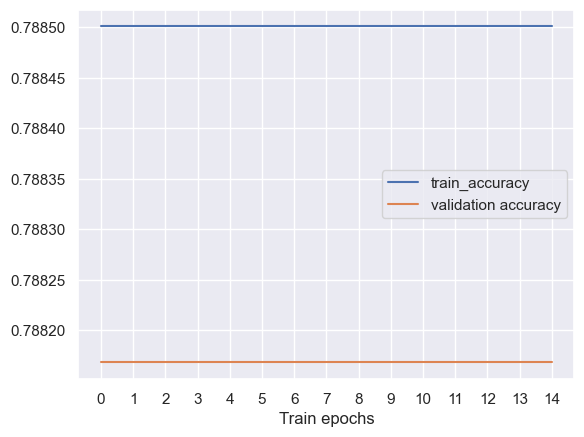

,loss,accuracy,val_loss,val_accuracy
0,0.518998,0.788501,0.516222,0.788168
1,0.515615,0.788501,0.516379,0.788168
2,0.515592,0.788501,0.516118,0.788168
3,0.515550,0.788501,0.516106,0.788168
4,0.515560,0.788501,0.516233,0.788168
5,0.515515,0.788501,0.516091,0.788168
6,0.515559,0.788501,0.516073,0.788168
7,0.515536,0.788501,0.516065,0.788168
8,0.515570,0.788501,0.516098,0.788168
9,0.515552,0.788501,0.516074,0.788168


In [9]:
num_epochs = 15

model1 = build_model1(0.01)
model1.summary()

history = model1.fit(
    x = X_train[["CreditScore"]],
    y = Y_train,
    epochs = num_epochs,
    batch_size = 32,
    validation_data = (
        X_val[["CreditScore"]],
        Y_val),
    verbose = 0)

train_accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
plt.plot(train_accuracy, label = "train_accuracy")
plt.plot(val_accuracy, label = "validation accuracy")
plt.xticks(range(num_epochs))
plt.xlabel("Train epochs")
plt.legend()
plt.show()

history = pd.DataFrame(history.history)
display(history)

In [10]:
def build_model2(optimizer = "SGD", learning_rate = 0.01):
    
    tf.keras.backend.clear_session()
    tf.random.set_seed(0)

    credit_score = tf.keras.layers.Input(shape = (1, ), dtype = tf.float64, name = "CreditScore")
    geography = tf.keras.layers.Input(shape = (1, ), dtype = tf.float64, name = "Geography")
    gender = tf.keras.layers.Input(shape = (1, ), dtype = tf.float64, name = "Gender")
    age = tf.keras.layers.Input(shape = (1, ), dtype = tf.float64, name = "Age")
    tenure = tf.keras.layers.Input(shape = (1, ), dtype = tf.float64, name = "Tenure")
    balance = tf.keras.layers.Input(shape = (1, ), dtype = tf.float64, name = "Balance")
    numProducts = tf.keras.layers.Input(shape = (1, ), dtype = tf.float64, name = "NumOfProducts")
    crCard = tf.keras.layers.Input(shape = (1, ), dtype = tf.float64, name = "HasCrCard")
    activeMember = tf.keras.layers.Input(shape = (1, ), dtype = tf.float64, name = "IsActiveMember")
    salary = tf.keras.layers.Input(shape = (1, ), dtype = tf.float64, name = "EstimatedSalary")

    features = tf.keras.layers.Concatenate()([credit_score, geography, gender, age, tenure, balance, numProducts, crCard, activeMember, salary])

    #add dense layer 1
    hidden1 = tf.keras.layers.Dense(units = 32, activation = "relu", name = "hidden1")(features)
    
    #add dense layer 2
    hidden2 = tf.keras.layers.Dense(units = 24, activation = "relu", name = "hidden2")(hidden1)

    #add dense layer 3
    hidden3 = tf.keras.layers.Dense(units = 12, activation = "relu", name = "hidden3")(hidden2)

    #add output layer
    dx = tf.keras.layers.Dense(units = 1, activation = "sigmoid", name = "Dx")(hidden3)
    
    #configure model
    model = tf.keras.Model(inputs = [credit_score, geography, gender, age, tenure, balance, numProducts, crCard, activeMember, salary], outputs = dx, name = "model2")

    if optimizer == "SGD":
        optimizer = tf.keras.optimizers.SGD(learning_rate = learning_rate)
    elif optimizer == "Adam": #for testing
        optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate)
    
    model.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics = ['accuracy'])
    
    return model

Model: "model2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 CreditScore (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 Geography (InputLayer)         [(None, 1)]          0           []                               
                                                                                                  
 Gender (InputLayer)            [(None, 1)]          0           []                               
                                                                                                  
 Age (InputLayer)               [(None, 1)]          0           []                               
                                                                                             

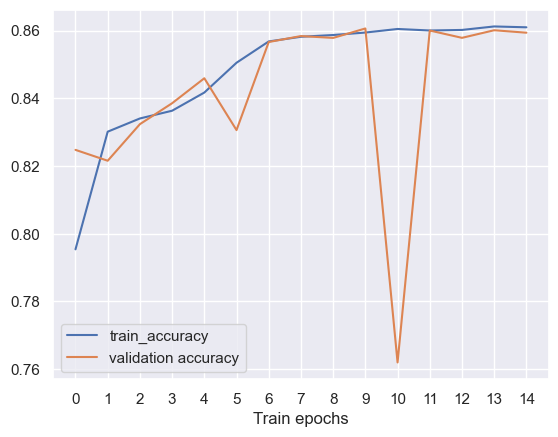

,loss,accuracy,val_loss,val_accuracy
0,0.458144,0.795400,0.416766,0.824766
1,0.403026,0.830138,0.417511,0.821555
2,0.394001,0.834042,0.395543,0.832361
3,0.388716,0.836327,0.384488,0.838541
4,0.375519,0.841694,0.362991,0.845913
5,0.350076,0.850497,0.388364,0.830603
6,0.339081,0.856790,0.341595,0.856618
7,0.336234,0.858167,0.335122,0.858375
8,0.334586,0.858686,0.338110,0.857830
9,0.333692,0.859413,0.333898,0.860617


In [11]:
model2 = build_model2(learning_rate = 0.01)
model2.summary()

history = model2.fit(
    x = {
        "CreditScore": X_train[["CreditScore"]],
        "Geography": X_train[["Geography"]],
        "Gender": X_train[["Gender"]],
        "Age": X_train[["Age"]],
        "Tenure": X_train[["Tenure"]],
        "Balance": X_train[["Balance"]],
        "NumOfProducts": X_train[["NumOfProducts"]],
        "HasCrCard": X_train[["HasCrCard"]],
        "IsActiveMember": X_train[["IsActiveMember"]],
        "EstimatedSalary": X_train[["EstimatedSalary"]],
    },
    y = Y_train,
    epochs = num_epochs,
    batch_size = 32,
    validation_data = (
        {
            "CreditScore": X_val[["CreditScore"]],
            "Geography": X_val[["Geography"]],
            "Gender": X_val[["Gender"]],
            "Age": X_val[["Age"]],
            "Tenure": X_val[["Tenure"]],
            "Balance": X_val[["Balance"]],
            "NumOfProducts": X_val[["NumOfProducts"]],
            "HasCrCard": X_val[["HasCrCard"]],
            "IsActiveMember": X_val[["IsActiveMember"]],
            "EstimatedSalary": X_val[["EstimatedSalary"]],
        },
        Y_val),
    verbose = 0)

train_accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
plt.plot(train_accuracy, label = "train_accuracy")
plt.plot(val_accuracy, label = "validation accuracy")
plt.xticks(range(num_epochs))
plt.xlabel("Train epochs")
plt.legend()
plt.show()

history = pd.DataFrame(history.history)
display(history)

In [12]:
def build_model3(optimizer = "SGD", learning_rate = 0.01):
    
    tf.keras.backend.clear_session()
    tf.random.set_seed(0)

    credit_score = tf.keras.layers.Input(shape = (1, ), dtype = tf.float64, name = "CreditScore")
    geography = tf.keras.layers.Input(shape = (1, ), dtype = tf.float64, name = "Geography")
    gender = tf.keras.layers.Input(shape = (1, ), dtype = tf.float64, name = "Gender")
    age = tf.keras.layers.Input(shape = (1, ), dtype = tf.float64, name = "Age")
    tenure = tf.keras.layers.Input(shape = (1, ), dtype = tf.float64, name = "Tenure")
    balance = tf.keras.layers.Input(shape = (1, ), dtype = tf.float64, name = "Balance")
    numProducts = tf.keras.layers.Input(shape = (1, ), dtype = tf.float64, name = "NumOfProducts")
    crCard = tf.keras.layers.Input(shape = (1, ), dtype = tf.float64, name = "HasCrCard")
    activeMember = tf.keras.layers.Input(shape = (1, ), dtype = tf.float64, name = "IsActiveMember")
    salary = tf.keras.layers.Input(shape = (1, ), dtype = tf.float64, name = "EstimatedSalary")

    features = tf.keras.layers.Concatenate()([credit_score, geography, gender, age, tenure, balance, numProducts, crCard, activeMember, salary])

    #add dense layer 1
    hidden1 = tf.keras.layers.Dense(units = 64, activation = "relu", name = "hidden1")(features)

    #add dense layer 2
    hidden2 = tf.keras.layers.Dense(units = 128, activation = "relu", name = "hidden2")(hidden1)

    #add dense layer 3
    hidden3 = tf.keras.layers.Dense(units = 254, activation = "relu", name = "hidden4")(hidden2)

    #add dense layer 5
    hidden4 = tf.keras.layers.Dense(units = 32, activation = "relu", name = "hidden5")(hidden3)

    #add output layer
    dx = tf.keras.layers.Dense(units = 1, activation = "sigmoid", name = "Dx")(hidden4)
    
    #configure model
    model = tf.keras.Model(inputs = [credit_score, geography, gender, age, tenure, balance, numProducts, crCard, activeMember, salary], outputs = dx, name = "model3")

    if optimizer == "SGD":
        optimizer = tf.keras.optimizers.SGD(learning_rate = learning_rate)
    elif optimizer == "Adam": #for testing
        optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate)
    
    model.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics = ['accuracy'])
    
    return model

Model: "model3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 CreditScore (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 Geography (InputLayer)         [(None, 1)]          0           []                               
                                                                                                  
 Gender (InputLayer)            [(None, 1)]          0           []                               
                                                                                                  
 Age (InputLayer)               [(None, 1)]          0           []                               
                                                                                             

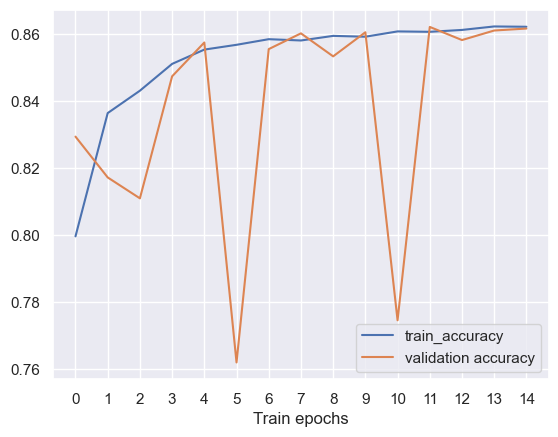

,loss,accuracy,val_loss,val_accuracy
0,0.456209,0.799668,0.420225,0.829432
1,0.388687,0.836457,0.412776,0.817253
2,0.364711,0.843139,0.474207,0.811012
3,0.346682,0.851138,0.350807,0.847428
4,0.340462,0.855405,0.337449,0.857527
5,0.337009,0.856834,0.476294,0.762033
6,0.334974,0.858513,0.343257,0.855547
7,0.333434,0.858123,0.332424,0.860253
8,0.331984,0.859500,0.341813,0.853386
9,0.331086,0.859249,0.333126,0.860576


In [13]:
model3 = build_model3(learning_rate = 0.01)
model3.summary()

history = model3.fit(
    x = {
        "CreditScore": X_train[["CreditScore"]],
        "Geography": X_train[["Geography"]],
        "Gender": X_train[["Gender"]],
        "Age": X_train[["Age"]],
        "Tenure": X_train[["Tenure"]],
        "Balance": X_train[["Balance"]],
        "NumOfProducts": X_train[["NumOfProducts"]],
        "HasCrCard": X_train[["HasCrCard"]],
        "IsActiveMember": X_train[["IsActiveMember"]],
        "EstimatedSalary": X_train[["EstimatedSalary"]],
    },
    y = Y_train,
    epochs = num_epochs,
    batch_size = 32,
    validation_data = (
        {
            "CreditScore": X_val[["CreditScore"]],
            "Geography": X_val[["Geography"]],
            "Gender": X_val[["Gender"]],
            "Age": X_val[["Age"]],
            "Tenure": X_val[["Tenure"]],
            "Balance": X_val[["Balance"]],
            "NumOfProducts": X_val[["NumOfProducts"]],
            "HasCrCard": X_val[["HasCrCard"]],
            "IsActiveMember": X_val[["IsActiveMember"]],
            "EstimatedSalary": X_val[["EstimatedSalary"]],
        },
        Y_val),
    verbose = 0)

train_accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
plt.plot(train_accuracy, label = "train_accuracy")
plt.plot(val_accuracy, label = "validation accuracy")
plt.xticks(range(num_epochs))
plt.xlabel("Train epochs")
plt.legend()
plt.show()

history = pd.DataFrame(history.history)
display(history)

1548/1548 [==============================] - 1s 321us/step
              precision    recall  f1-score   support

           0       0.87      0.96      0.92     39023
           1       0.78      0.48      0.60     10488

    accuracy                           0.86     49511
   macro avg       0.83      0.72      0.76     49511
weighted avg       0.85      0.86      0.85     49511



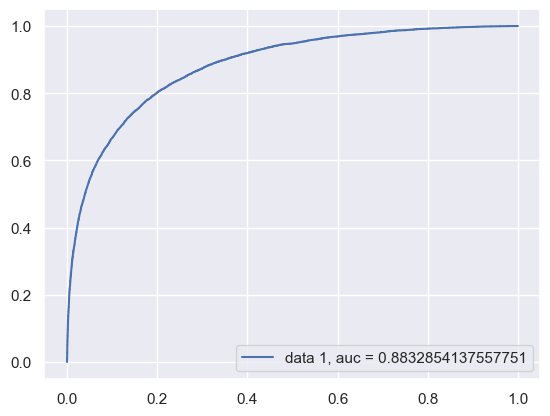

In [14]:
predict_val = model3.predict({
            "CreditScore": X_val[["CreditScore"]],
            "Geography": X_val[["Geography"]],
            "Gender": X_val[["Gender"]],
            "Age": X_val[["Age"]],
            "Tenure": X_val[["Tenure"]],
            "Balance": X_val[["Balance"]],
            "NumOfProducts": X_val[["NumOfProducts"]],
            "HasCrCard": X_val[["HasCrCard"]],
            "IsActiveMember": X_val[["IsActiveMember"]],
            "EstimatedSalary": X_val[["EstimatedSalary"]],
        })

fpr, tpr, _ = metrics.roc_curve(Y_val, predict_val)
auc = metrics.roc_auc_score(Y_val, predict_val)
plt.plot(fpr, tpr, label = "data 1, auc = " + str(auc))
plt.legend(loc = 4)

predict_val[predict_val <= 0.5] = 0
predict_val[predict_val > 0.5] = 1

print(metrics.classification_report(Y_val, predict_val))

plt.show()

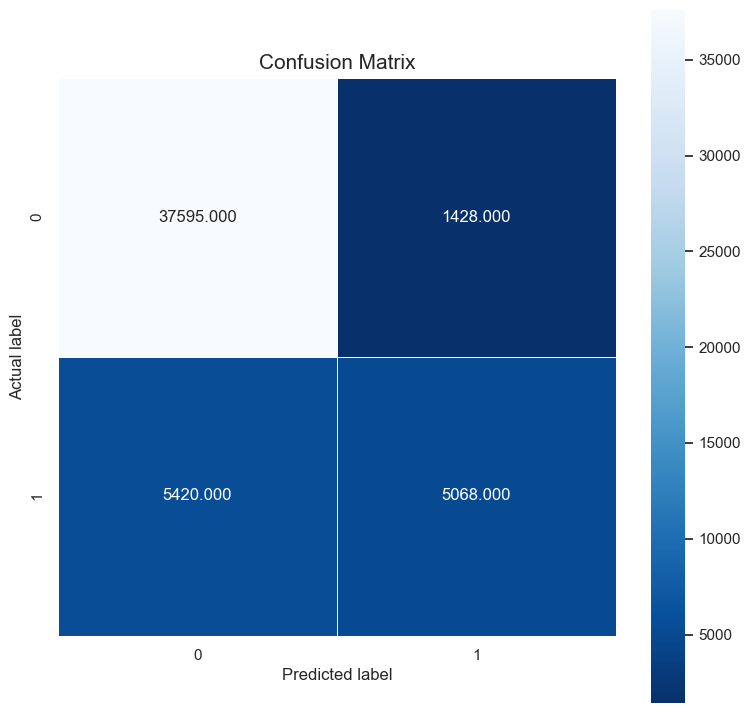

In [15]:
confusion_matrix = metrics.confusion_matrix(Y_val, predict_val)

plt.figure(figsize = (9,9))
sns.heatmap(confusion_matrix, annot = True, fmt = ".3f", linewidths=.5, square = True, cmap = "Blues_r")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.title("Confusion Matrix", size = 15)

plt.show()

In [16]:
model3.save("MNN_norm.keras")